In [122]:
"Library Import"

import numpy as np
import pandas as pd 
import xarray as xr
import matplotlib.pyplot as plt

import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html  

### 1) Basic Statistics

#### a) Bayes Theorem. Assume background rates of COVID are 90% negative, 10% positive AND COVID tests are accurate 80% of the time, but fail 20% of the time. Your friend goes and gets a COVID test. Your friend test negative. What is the probability that your friend is actually negative? Explain to your friend how you are using Bayes theorem to informyour thinking. Hint: Review Lecture #1 and the 1.2.2.2 of the Barnes Notes. (10 points)

From the lecture, Bayes theorem take <b><i>Pr(A|B)</b></i>, the probability that the test is accurate (test is negative <u> and you are negative</u>, and turns it into <b><i>Pr(B|A)</b></i>, the probability that the test had failed test is negative, <u>but you are actually positive</u>).
    
In the context of this question, the background and test reliability information is 
    
- P(N): % negative population, 90%
- P(T): % positive population, 10%
- P(T|N): probability of accurate test, 80%
- P(N|T): probability of failed test, 20%

We want to know the probability of actually being negative given the test's reliability of saying you are negative, P(N|T).
    
Application of Bayes Theorem describes the expression for <b><i>P(N|T)</b></i> in the context of this test as:

$$P(N|T) = \frac{P(T|N)P(N)}{P(T|N)P(N)+P(T|P)P(P)}$$

Where the numerator is the test is correct and the denominator is all possible outcomes. 

In [2]:
def Bayes(P_BA, P_B, P_AB,P_A):
    """
    Calculates basic Bayes theorem.
    Input:
        - P_BA: P(B|A), the probability of A declares B occured
        - P_B: P(B), the probability B occuring
        - P_AB: P(A|B), the probability of A inaccurately declares B occured
        - P_A: P(A), the probability of A occuring
    """
    test_is_correct = P_BA*P_B
    all_poss_outcomes = (P_BA*P_B)+(P_AB*P_A)
    return test_is_correct/all_poss_outcomes

#Background Information
P_N = 0.9 # Percent of negative population
P_P = 0.1 # Percent of positive population

#COVID Test Reliability
P_TN = 0.80 # Probabiilty test is accurate (Test is Neg and You are Neg)
P_TP = 0.20 # Probability test is incorrect (Test is Neg but you are Pos)

P_NT = Bayes(P_TN,P_N, P_TP, P_P)
print('The probability that this friend is actually negative is: ' + str(np.round(P_NT,2)*100)+'%')

The probability that this friend is actually negative is: 97.0%


To explain this to a friend, I would list the background and COVID Test reliability probabilities. Given those probabilities, a realistic view of the test is dependent given how many have/don't have COVID and the accuracy of the test themselves. Like in easier and more relatable probability calculations we did in grade school (ex: likeliness of drawing a specific card from a deck followed by a second specific card from a deck) I would compare Bayes theorem to that practice. The given percentages of background and COVID test reliability influence the true outcome of something happening. In this case, given that the majority of the population is negative, the test will naturally be more reliable as we are looking for test accuracy given that most people are likely negative. Since the accuracy of the test is relatively consistent, I would futher mention that the changes of population COVID contraction will influence the accuracy of the test given by the sheer chance of COVID exposure and subsequent likeliness of contracting it themselves.

#### b) Explain how to test whether a sample mean is significantly different than zero at the 95% confidence level and the 99% confidence level. State each of the 5 steps in hypothesis testing that you are using. For step 4, calculate the specific critical value assuming a two-tailed test. Contrast your approach for a sample with 15 independent observations (N=15) and a sample 1000 independent observations (N=1000). (15 points)

For N>30, we need to use a t-test and for N>30 observations, we should use a z-test. Before implementing a z-test, we need to look at the distribution of observations to ensure there appears to be a normal, standaridzed distribution. We should note that with large enough N, both the z and t test will converge. 

We initialize the z-test by defining a variable $z$ where $\mu = mean$, $\sigma = 1$, and x is an evenly distributed range of values to plot against. The standard normal distribution allows us to accurately determine the probability of a sample mean occuring at specific intervals defined by the standard deviation (SD). A sample mean +/- 1SD of the population mean indicates a 31.73% chance that z falls outside of the mean. In other words there is a 68.27% confidence interval that a sample mean will fall within what is expected in the population mean:

<i> Confidence Intervals </i>
- +/- 1SD: 68.27%
- +/- 2SD: 95.45%
- +/- 3SD: 99.73%

<b>The five steps in hypothesis testing are as follows: </b>
1) State the significance level, $\alpha$

- We will do two tests, at the 95% and 99% confidence interval,  two-tailed t-test for N=15 and z-test for N=1000     
    
2) State the null and alternative hypothesis.

- $H_0$: The sample mean <b>does not differ</b> from the population mean.
    
- $H_1$: The sample mean <b>differs</b> from the population mean.
    
3) State the statistic to be used, and the assumptions req to use it

- The statistic will be randomly generated "independent observations" for N=15 and for N=1000.
    
4) State the critical region

- For both the z- and t- tests, we calculate the degrees of freedom:
    $$
    \mu = N-1 = 15-1 = 14
    $$
    
    The critical value can be found via lookup table or with a python function. 
    
5) Evaluate the statistic and state conclusion.

    For the two-tailed T-Test if the sample mean differs from the population mean and the probability is low that it happened by chance (t-statistic < t-crit) we can reject the null hypothesis.
    
    For the z-test, if the z-statistic does not meet or exceed the z-critical value, we cannot reject the null hypothesis.

In [583]:
#Part 4a: Retrive t-critical values at 95% and 99% confidence intervals for N=15 and N=1000

Z = np.random.randn(15,1)
M_N15 = np.empty([15, 1])
M_N1000 = np.empty([1000, 1])


for iloop in range(15):
    ip = np.random.randint(low=0,high=Z.shape[0],size=15) 
    M_N15[iloop] = np.max(Z[ip])

for iloop in range(1000):
    ip = np.random.randint(low=0,high=Z.shape[0],size=1000) 
    M_N1000[iloop] = np.max(Z[ip])

N = 15

tstat_95 = (stats.t.ppf(0.975, N - 1))
tstat_99 = stats.t.ppf(0.995,N-1)
print('------------------------------------')
print('          N=15 RESULTS')
print('------------------------------------')
print('The python retrieved t-critical value at 95% is :', np.round(tstat_95,3))
print('The table referenced t-critical value at 95% is : 2.145')
print('----')
print('The python retrieved t-critical value at 99% is :', np.round(tstat_99,3))
print('The table referenced t-critical value at 99% is : 2.977')
print('------------------------------------')
print('          N=1000 RESULTS')
print('------------------------------------')
N=1000
tstat_95 = (stats.t.ppf(0.975, N - 1))
tstat_99 = stats.t.ppf(0.995,N-1)

print('The python retrieved t-critical value at 95% is :', np.round(tstat_95,3))

print('----')
print('The python retrieved t-critical value at 99% is :', np.round(tstat_99,3))


------------------------------------
          N=15 RESULTS
------------------------------------
The python retrieved t-critical value at 95% is : 2.145
The table referenced t-critical value at 95% is : 2.145
----
The python retrieved t-critical value at 99% is : 2.977
The table referenced t-critical value at 99% is : 2.977
------------------------------------
          N=1000 RESULTS
------------------------------------
The python retrieved t-critical value at 95% is : 1.962
----
The python retrieved t-critical value at 99% is : 2.581


#### c) Design your own homework problem to compare two sample means using data of your own choice. In other words, test whether two sample means are statistically different. Follow all five steps of hypothesis testing. Hint: See page 26 of Barnes notes for an example. (15 points)

    My homework problems will use the same dataset, which is the LES Cloud Simulations I am using for my own personal research to detect clouds through parallax and radiance thresholding. We won't go into parallax in this case, but it would be a useful exercise to study how radiance can compare how areas can change with differing viewing zenith angles (VZA). The two images are of the same area and cloud field, but with different viewing angles so we know that clouds will have an apparent shift, but the exercise can statistically show how the same area can change with the parallax. 

We will compare two sample means between a known, bright cloudy area from an image taken at 0 degrees VZA and a the same area at 30 degrees VZA. I chose those areas because I'm actually having a little trouble with identifying them, so it'll be a nice exercise.  I will test if these how these sample means differ from the entire image radiance (population mean). 

<b>The five steps in hypothesis testing are as follows: </b>
1) State the significance level, $\alpha$

- Conduct a two tailed t-test at the 95% interval,  two-tailed t-test for 1000 bootstrapped cloudy areas in samples 1 and 2.
    
2) State the null and alternative hypothesis.

- $H_0$: Sample mean 1 (cloudy pixel area 1) <b>does not differ</b> from sample mean 2.
    
- $H_1$: Sample mean 1 (cloudy pixel area 1) <b>differs</b> from sample mean 2.
    
3) State the statistic to be used, and the assumptions required to use it

- The statistic will be randomly generated "independent observations".
    
4) State the critical region

- For t-tests, we calculate the degrees of freedom:
    
    The critical value can be found via lookup table or with a python function. 
    
5) Evaluate the statistic and state conclusion.

    For the two-tailed T-Test if sample mean 1 differs from sample mean 2 and the probability is low that it happened by chance (t-statistic < t-crit) we can reject the null hypothesis.

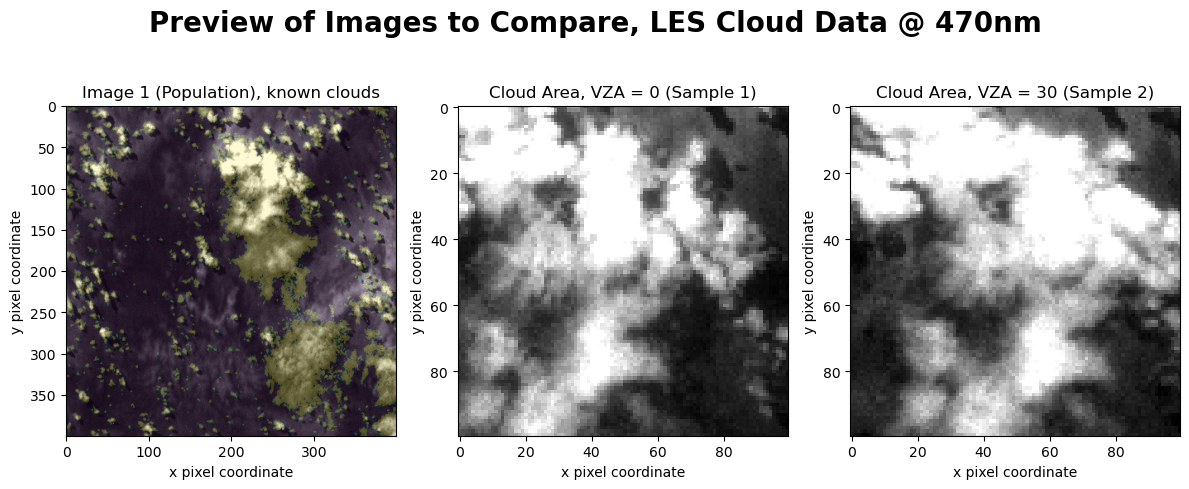

In [538]:
import h5py
from glob import glob
f = h5py.File('/Users/kado8663/Documents/CAMPEX/Cases/er3t/cloud_mask.h5', 'r') # CHANGE
cloud_mask = f['cloud_mask'][40:-40, 40:-40]
f.close()

def openh5(file, scale=3):
    """
    Reads in radiance .h5 file, scales as appropriate and returns a normalized image array
    INPUTS:
        - file: the .h5 radiance file to be read in.
        - scale: the magintude to multiply the image array with. Useful 
                 for helping to bring out bright/cloudy features.
    RETURNS:
        - scaled image array ready for visualization. 
    """
    f = h5py.File(file, 'r')
    img = f['mean/rad'][40:-40, 40:-40]*scale
    f.close()
    
    flt = np.where(img[:,:]>1)
    img[flt]=1. #normalizes
    
    return img

path   = '/Users/kado8663/Documents/Class Files/ATOC 5860/ATOC5860_ACTUAL/homework1/'
files = sorted(glob(path+'*.h5'))
png1  = openh5(files[1])
png2  = openh5(files[2])

cloud_box_vza_000 = png1[50:150,200:300]
cloud_box_vza_030 = png2[50:150,200:300]

cloud_mask_box = cloud_mask[50:150,200:300] # only confirms cloudy pixels at VZA = 000

f, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].imshow(png1, cmap='binary_r', vmax=1)
ax[0].imshow(cloud_mask, alpha=0.2)
ax[0].set_title('Image 1 (Population), known clouds')

ax[1].imshow(cloud_box_vza_000, cmap='binary_r')
# ax[1].imshow(bright_cloud_mask_box, alpha=0.2)
ax[1].set_title('Cloud Area, VZA = 0 (Sample 1)')

ax[2].imshow(cloud_box_vza_030, cmap='binary_r')
ax[2].set_title('Cloud Area, VZA = 30 (Sample 2)')


for i in range(3):
    ax[i].set_xlabel('x pixel coordinate')
    ax[i].set_ylabel('y pixel coordinate')
    
f.suptitle('Preview of Images to Compare, LES Cloud Data @ 470nm', fontweight='bold', size=20)
f.tight_layout()

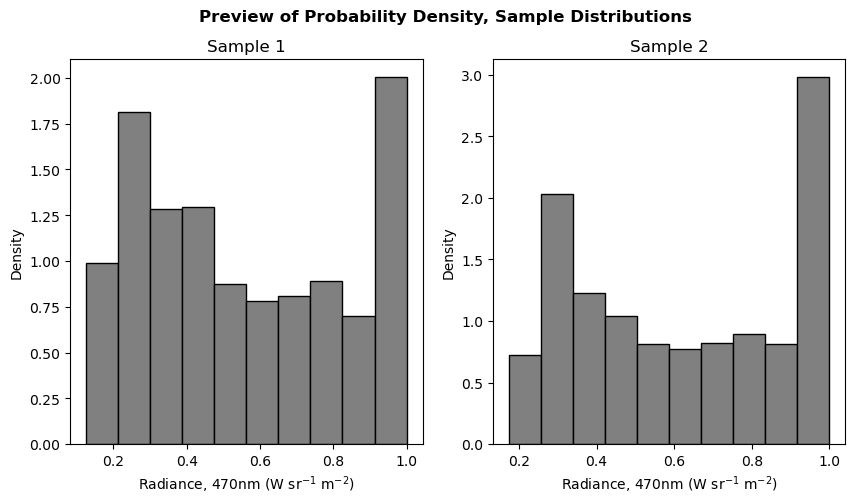

In [554]:
sample_1 = cloud_box_vza_000.flatten()
sample_2 = cloud_box_vza_030.flatten()
sample_mean_1 = np.mean(sample_1)
sample_mean_2 = np.mean(sample_2)

sample_mean_1, sample_mean_2

f, ax = plt.subplots(1,2, figsize=(10,5))
f.suptitle('Preview of Probability Density, Sample Distributions', fontweight='bold')
ax[0].hist(cloud_box_vza_000.flatten(), density=True, color='grey', ec='k')
ax[0].set_title('Sample 1')
ax[1].hist(cloud_box_vza_030.flatten(), density=True, color='grey', ec='k')
ax[1].set_title('Sample 2')

for i in range(2):
    ax[i].set_xlabel('Radiance, 470nm (W sr$^{−1}$ m$^{−2}$)')
    ax[i].set_ylabel('Density')

The histograms above show that these definitely are not normal distributions, so we need to bootstrap to produce a normal distribution in order for us to use a t-test or Welch's T-Test. I'm not entirely sure if this is an appropriate way to look at radiances, but for the sake of the problem, it will be nice to play with the data.

------------------------------------
          SAMPLE 1 RESULTS
------------------------------------
Mean Avg:  0.5600154453717219
Mean std:  0.03974310133438514
Mean min:  0.4426785597309504
Mean max:  0.6907895515322173
------------------------------------
          SAMPLE 2 RESULTS
------------------------------------
Mean Avg:  0.6250240935052739
Mean std:  0.039082872955386115
Mean min:  0.5072851165833584
Mean max:  0.7490681950672291


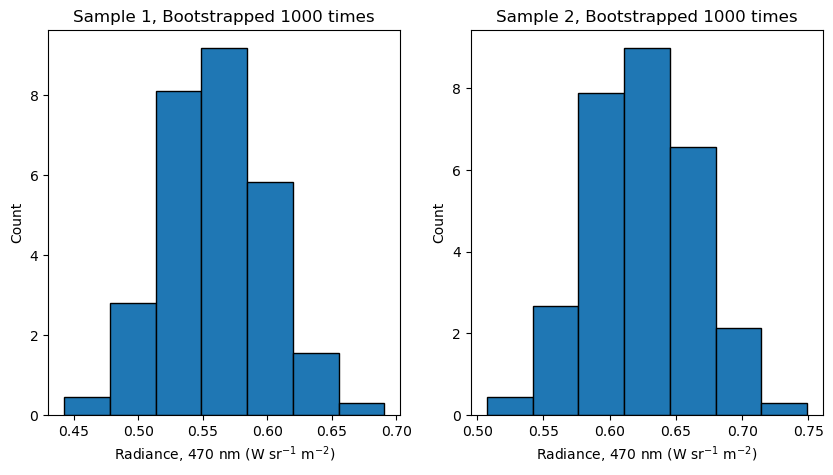

In [550]:
### Now Bootstrap Nbs times to generate a distribution of randomly selected mean SWE.
Num_BootStraps = 1000
P_Bootstrap1=np.empty((Num_BootStraps,50)) #initialize empty array to fill in bootstrapped samples
P_Bootstrap2=np.empty((Num_BootStraps,50)) #initialize empty array to fill in bootstrapped samples

## loop over to fill in array with randomly selected values
for ii in range(Num_BootStraps):
    P_Bootstrap1[ii,:]=np.random.choice(sample_1,50)
    P_Bootstrap2[ii,:]=np.random.choice(sample_2,50)

print('------------------------------------')
print('          SAMPLE 1 RESULTS')
print('------------------------------------')
P_Bootstrap_mean1=np.mean(P_Bootstrap1,axis=1)
P_Bootstrap_mean_avg1=np.mean(P_Bootstrap_mean1)
print('Mean Avg: ', P_Bootstrap_mean_avg1)
P_Bootstrap_mean_std1=np.std(P_Bootstrap_mean1)
print('Mean std: ', P_Bootstrap_mean_std1)
P_Bootstrap_mean_min1=np.min(P_Bootstrap_mean1)
print('Mean min: ', P_Bootstrap_mean_min1)
P_Bootstrap_mean_max1=np.max(P_Bootstrap_mean1)
print('Mean max: ', P_Bootstrap_mean_max1)
print('------------------------------------')
print('          SAMPLE 2 RESULTS')
print('------------------------------------')
P_Bootstrap_mean2=np.mean(P_Bootstrap2,axis=1)
P_Bootstrap_mean_avg2=np.mean(P_Bootstrap_mean2)
print('Mean Avg: ', P_Bootstrap_mean_avg2)
P_Bootstrap_mean_std2=np.std(P_Bootstrap_mean2)
print('Mean std: ', P_Bootstrap_mean_std2)
P_Bootstrap_mean_min2=np.min(P_Bootstrap_mean2)
print('Mean min: ', P_Bootstrap_mean_min2)
P_Bootstrap_mean_max2=np.max(P_Bootstrap_mean2)
print('Mean max: ', P_Bootstrap_mean_max2)

### Use matplotlib to plot a histogram of the bootstrapped means to compare to the conditioned SWE mean
binsize=0.05
min4hist=np.round(np.min(P_Bootstrap_mean1),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean1),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

f, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(P_Bootstrap_mean1,nbins,edgecolor='black', density=True)
ax[0].set_title('Sample 1, Bootstrapped 1000 times')

ax[1].hist(P_Bootstrap_mean2,nbins,edgecolor='black', density=True)
ax[1].set_title('Sample 2, Bootstrapped 1000 times')

for i in range(2):
    ax[i].set_xlabel('Radiance, 470 nm (W sr$^{−1}$ m$^{−2}$)');
    ax[i].set_ylabel('Count');

In [589]:
N=1000
tstat_95 = (stats.t.ppf(0.975, N - 1))
tstat_99 = stats.t.ppf(0.995,N-1)
print('------------------------------------')
print('          N=15 RESULTS')
print('------------------------------------')
print('The python retrieved t-critical value at 95% is :', np.round(tstat_95,3))
print('----')

------------------------------------
          N=15 RESULTS
------------------------------------
The python retrieved t-critical value at 95% is : 1.962
----


In [584]:
print(f'Sample 1 Variance: ', np.var(P_Bootstrap_mean1))
print(f'     Sample 1 Std: ', np.std(P_Bootstrap_mean1))

print(f'Sample 2 Variance: ', np.var(P_Bootstrap_mean2))
print(f'     Sample 2 Std: ', np.std(P_Bootstrap_mean2))

Sample 1 Variance:  0.001579514103675206
     Sample 1 Std:  0.03974310133438514
Sample 2 Variance:  0.0015274709584468511
     Sample 2 Std:  0.039082872955386115


These distributions are much more T-test friendlt. The Variance and Standard Deviation are pretty close, but not exact. So for this problem we will need to compare using the Welch's T-Test.

In [587]:
#Welch's T-Test:
stats.ttest_ind(P_Bootstrap_mean1, P_Bootstrap_mean2, equal_var = False)

Ttest_indResult(statistic=-36.86245848006129, pvalue=2.247119706490785e-227)

In [586]:
#Welch's T-Test:
stats.ttest_ind(P_Bootstrap_mean1, P_Bootstrap_mean2, equal_var = True)

Ttest_indResult(statistic=-36.86245848006129, pvalue=2.176299087629578e-227)

If we use Welch's T-Test from the scipy.stats function, it returns t-test statistic of -36.862 and a p-value << 0, indicating that we can reject the null hypothesis.  In this case, this means we can say sample mean 1 differs from sample mean 2.

#### d) Design your own homework problem to place 95% confidence intervals on the mean value of a data variable of your choice. Use the non-standardized variable. Hint: See Barnes notes on Confidence Intervals. (10 points)

If we assume overall bootstrapped radiances are a single dataset containing 1000 radiance observations with a mean of 0.56 $W sr^{-1} m^{-2}$, what is the 95% confidence interval of this population mean (P_Bootstrap_mean1)? We can assume this distribtion is normal given the plot provided in part C.

What are the z-test 95% confidence intervals centered around the true population mean value of sample 1?

In [591]:
100*(1 - alpha/2.0), 100*(alpha/2.0)

(97.5, 2.5)

In [574]:
alpha=0.05
CI_up = np.percentile(P_Bootstrap_mean1, 100*(1 - alpha/2.0))
CI_lo = np.percentile(P_Bootstrap_mean1, 100*(alpha/2.0))
print('The 95% confidence interval (z-test) is: ', CI_lo, '<X<', CI_up)


The 95% confidence interval (z-test) is:  0.4871652951426969 <X< 0.6410152730229891


#### e) The F-statistic is used to compare two sample standard deviations. Design your own homework problem to compare two sample standard deviations and assess if they are different at the 95% confidence interval. Hint: See page 38 of the Barnes notes. Note: When calculating the f-statistic Barnes Chapter 1 Equation (122), the larger variance should always be on top (numerator) and the smaller variance should always be on bottom (denominator). i.e., F = Larger variance / Smaller variance. (10 points)

The F statistic is used to assess the ratio between two sample standard deviations. Using the bootstrapped mean arrays from samples 1 and 2, calculate the F statistic. 

In [592]:
sample_std1 = np.std(P_Bootstrap_mean1)
sample_var1 = np.var(P_Bootstrap_mean1)

sample_std2 = np.std(P_Bootstrap_mean2)
sample_var2 = np.var(P_Bootstrap_mean2)

if sample_var1 == sample_var2:
    F = (sample_std1**2)/(sample_std1**2)

elif sample_var1 > sample_var2:
    F = (sample_std1**2/sample_var1**2)/(sample_std2**2/sample_var2**2)
    
else: 
    F = (sample_std2**2/sample_var2**2)/(sample_std1**2/sample_var1**2)
    
print('The F Statistic is: ', F)

The F Statistic is:  0.967051167756425


#### 2) Compare composite-averages using t/z tests and bootstrapping. Note: coding is required for this problem. Please use python Jupyter notebooks. It will be helpful follow the ipython notebook examples introduced in Application Lab #1 and in lectures. (40 points) Your friend living in Fort Collins tells you that the air pressure is anomalous when there is measurable precipitation (greater than or equal to 0.01 inches). To test your friends’ hypothesis, use hourly observations from Fort Collins in 2014. The data include both the precipitation amount in units of inches and pressure in units of hPa at hourly frequency. The data file is called homework1_data.csv


#### a) What was the average pressure in 2014 ( $\bar{P}$)? What was the average pressure when it rained ($\bar{P}_{r>=0.01}$)? (10 points)

In [269]:
df = pd.read_csv('homework1_data.csv')
hPa = df.P_hPa.values
precip_record = df.R_inches.values
rain_filter = np.where(precip_record >= 0.01)

hPa_mean = np.mean(hPa)
hPa_std = np.std(hPa)

hPa_precip_mean = np.mean(hPa[rain_filter])
hPa_precip_std = np.std(hPa[rain_filter])


print('                       The average overall pressure (𝑃¯) in 2014 was: ', np.round(hPa_mean,2), 'hPa')
print('The average pressure with preciptiation (𝑃¯(rain>=0.01)) in 2014 was: ', np.round(hPa_precip_mean,2), 'hPa')


                       The average overall pressure (𝑃¯) in 2014 was:  846.33 hPa
The average pressure with preciptiation (𝑃¯(rain>=0.01)) in 2014 was:  847.03 hPa


#### b) Test your friends’ hypothesis by generating confidence intervals using both a t-statistic and a z-statistic. Is the average pressure different when it is raining? What is more appropriate to use as a statistical test – a t- or a z-statistic? Use 95% confidence interval. (15 points)

There are 8760 hourly observations in 2014. Out of those hourly observations, there are 384 events where precipitation met or exceeded 0.01 inches. If we use all 384 observations, we can use the z-statistic. 

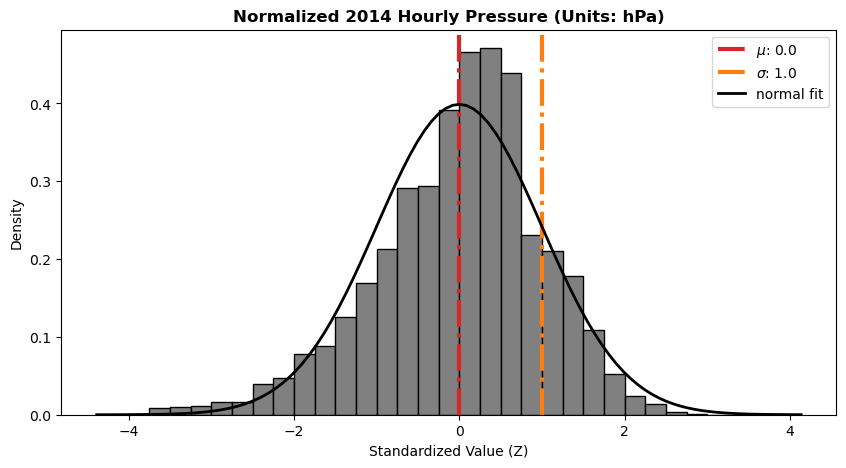

In [309]:
def NormalizeData(data, avg_data, std_data):
    data_norm      = (data-avg_data)/std_data
    data_norm_mean = np.mean(data_norm)
    data_norm_std  = np.std(data_norm)
    
    return data_norm, data_norm_mean, data_norm_std

hPa_norm, hPa_norm_mean, hPa_norm_std = NormalizeData(hPa, avg_hPa, std_hPa)
hPa_rain_norm, hPa_rain_norm_mean, hPa_rain_norm_std = NormalizeData(hPa[rain_filter], np.mean(hPa[rain_filter]), np.std(hPa[rain_filter]))

population_mean=hPa_norm_mean
population_std=hPa_norm_std

xinc = np.arange(-4,4,0.25)

plt.figure(figsize=(10,5))
plt.hist(hPa_norm, xinc, ec='k', color='grey', density=True)
plt.title('Normalized 2014 Hourly Pressure (Units: hPa)', fontweight='bold')
# plt.ylabel('Number of Samples')
plt.ylabel('Density')
plt.xlabel('Standardized Value (Z)')
plt.axvline(population_mean, label='$\mu$: '+str(np.round(population_mean,3)), color='tab:red', ls='-.', lw=3)
plt.axvline(population_std, label='$\sigma$: '+str(np.round(population_std,3)), color='tab:orange', ls='-.', lw=3)

xmin, xmax = plt.xlim()
mu, std = stats.norm.fit(hPa_norm)
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)

plt.plot(x,p,'k',lw=2, label='normal fit')


plt.legend()
plt.show()

The normalized hourly pressure appears to have a roughly normal distribution, where the mean ($\mu$) is nearly zero and the standard deviation ($\sigma$) is 1. 

### The Confidence Interval is defined as: 

$$
\mu_{lower} = \bar{x}-z \frac{\sigma}{\sqrt{N}}
$$

$$
\mu_{upper} = \bar{x}+z \frac{\sigma}{\sqrt{N}}
$$
\

### The Z-Statistic is defined as:

$$
z = \frac{\bar{x}-\mu_{\bar{X}}}{\sigma_\bar{X}} = \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{N}}}
$$


In [383]:
def Barnes(Xbar, mu, sigma, N):
    """
    INPUTS:
    XBAR: SAMPLE MEAN
    MU: MEAN
    SIGMA: STANDARD DEVIATION
    N: NUMBER OF SAMPLES/OBSERVATIONS
    
    RETURNS: Z
    """
    return (Xbar-mu)/(sigma/np.sqrt(N))

def Z(single_value, population_mean, population_std):
    z_statistic = (single_value - population_mean)/(population_std/np.sqrt(384))
    print('------------------------')    
    print('Z CALCULATION PARAMETERS')
    print('------------------------')

    print('    Sample Mean: ', np.round(single_value,4))
    print('Population Mean: ', np.round(population_mean,4))
    print(' Population STD: ', np.round(population_std,4))
    print('    Z-Statistic: ', np.round(z_statistic,4))
    print('------------------------')
    return z_statistic

def ZConfidenceInterval(pop_mean, pop_std, N, percentile, percentile_str):
    zstat = stats.norm.ppf(percentile)
    lower_limit = pop_mean-zstat*(pop_std/np.sqrt(N))
    upper_limit = pop_mean+zstat*(pop_std/np.sqrt(N))
    print(percentile_str+' confidence interval - z-statistic: ' +\
          str(np.round(lower_limit,2)) + '< X < ' +str(np.round(upper_limit,2)))
    
def TConfidenceInterval(pop_mean, pop_std, N, percentile, percentile_str):
    df = N-1
    tstat=stats.t.ppf(percentile,df)
    lower_limit = pop_mean-tstat*(pop_std/np.sqrt(N))
    upper_limit = pop_mean+tstat*(pop_std/np.sqrt(N))
    print(percentile_str+' confidence interval - t-statistic: ' +\
          str(np.round(lower_limit,2)) + '< X < ' +str(np.round(upper_limit,2)))

## Using Barnes equation (83) to calculate probability using z-statistic
sample_mean     = np.mean(hPa_norm[rain_filter])
population_mean = hPa_norm_mean
population_std  = hPa_norm_std

xstd=population_std/np.sqrt(hPa_norm[rain_filter].shape[0])


z=Z(sample_mean, population_mean, population_std)

z=(sample_mean-population_mean)/xstd

prob=(1-stats.norm.cdf(z))*100

print("Probability (%) that this event occured by chance: ", np.round(prob,2))
ZConfidenceInterval(population_mean, population_std,hPa[rain_filter].shape[0], 0.975, '95%')
# TConfidenceInterval(population_mean, population_std,hPa[rain_filter].shape[0], 0.975, '95%')


------------------------
Z CALCULATION PARAMETERS
------------------------
    Sample Mean:  0.1243
Population Mean:  0.0
 Population STD:  1.0
    Z-Statistic:  2.4365
------------------------
Probability (%) that this event occured by chance:  0.74
95% confidence interval - z-statistic: -0.1< X < 0.1
95% confidence interval - t-statistic: -0.1< X < 0.1


Based on these results on both a z-test and t-test, the 95% confidence interval is +/- 0.1 in a normalized distribution.

In [429]:
sample_mean     = np.mean(hPa[rain_filter])
population_mean = hPa_mean
population_std  = hPa_std

xstd=population_std/np.sqrt(hPa_norm[rain_filter].shape[0])


z=Z(sample_mean, population_mean, population_std)

z=(sample_mean-population_mean)/xstd

prob=(1-stats.norm.cdf(z))*100

print("Probability (%) that this event occured by chance: ", np.round(prob,2))
# ZConfidenceInterval(population_mean, population_std,hPa[rain_filter].shape[0], 0.975, '95%')
TConfidenceInterval(population_mean, population_std,hPa[rain_filter].shape[0], 0.975, '95%')


------------------------
Z CALCULATION PARAMETERS
------------------------
    Sample Mean:  847.0306
Population Mean:  846.3322
 Population STD:  5.6169
    Z-Statistic:  2.4365
------------------------
Probability (%) that this event occured by chance:  0.74
95% confidence interval - t-statistic: 845.77< X < 846.9


In [432]:
## Calculate the t-statistic using the Barnes Notes - Compare two sample means.  Equation (110)
## This is also called Welch's t-test.  See page 26 of Chapter 1 of the Barnes notes for a worked example.

hPa_rain=hPa[rain_filter]

N_population=len(hPa)
N_sample=len(hPa_rain)
print(f'N_hPa={N_population}, N_sample_hPa_rain={N_sample}')
population_mean=np.mean(hPa)
sample_mean=np.mean(hPa_rain)
print(population_mean)
print(sample_mean)
population_std=np.std(hPa)
sample_std=np.std(hPa_rain)
print(population_std)
print(sample_std)

print("T-statistic using Barnes Eq. 109/Eq. 110 - Welch's t-test:")
s=np.sqrt((N_population*population_std**2+N_sample*sample_std**2)/(N_population+N_sample-2))
print(f's: {np.round(s,2)}')
tw=(population_mean-sample_mean-0)/(s*np.sqrt(1/N_population+1/N_sample))
print(f'tw: {np.round(tw,2)}')
prob=(1-stats.t.cdf(tw,N-1))*100
print(f'Probability (percent): {np.round(prob,0)}%')

### Always try to code it yourself to understand what you are doing.
## Word to the wise - understand what is "under the hood" of your python function...
## Wait a second - What is that stats.ttest_ind function doing???  
# Check out the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

print('Null Hypothesis: Rain hPa observations have the same mean as the full record.')
t=stats.ttest_ind(hPa[rain_filter],hPa,equal_var=False)
print(f't-statistic: {np.round(t.statistic,2)}')
print(f'pvalue: {np.round(t.pvalue,2)}')

if t.statistic>t.pvalue:
    print('Can reject the null hypthesis.')
else:
    print('Cannot reject the null hypthesis.')  

N_hPa=8760, N_sample_hPa_rain=384
846.3322317351598
847.030625
5.616929884923219
5.379427064927547
T-statistic using Barnes Eq. 109/Eq. 110 - Welch's t-test:
s: 5.61
tw: -2.39
Probability (percent): 99.0%
Null Hypothesis: Rain hPa observations have the same mean as the full record.
t-statistic: 2.48
pvalue: 0.01
Can reject the null hypthesis.


Based on the t-test, we can reject the null hypothesis.

#### c) Instead of the t/z-test – use bootstrap sampling to determine whether the local pressure is anomalously high during times when it is raining. How does your answer compare with your results using the t/z-test? (15 points)

Mean Avg:  846.3414684
Mean std:  0.790079012176282
Mean min:  843.6207999999999
Mean max:  849.2518000000001


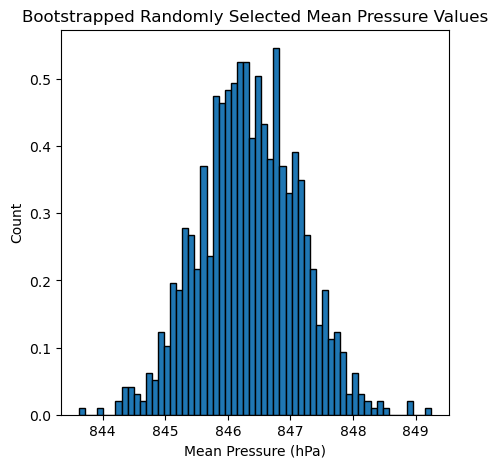

In [385]:
### Now Bootstrap Nbs times to generate a distribution of randomly selected mean SWE.
Num_BootStraps = 1000
P_Bootstrap=np.empty((Num_BootStraps,50)) #initialize empty array to fill in bootstrapped samples

## loop over to fill in array with randomly selected values
for ii in range(Num_BootStraps):
    P_Bootstrap[ii,:]=np.random.choice(hPa,50)

## Calculate the means of your randomly selected hPa values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print('Mean Avg: ', P_Bootstrap_mean_avg)
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print('Mean std: ', P_Bootstrap_mean_std)
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print('Mean min: ', P_Bootstrap_mean_min)
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print('Mean max: ', P_Bootstrap_mean_max)

### Use matplotlib to plot a histogram of the bootstrapped means to compare to the conditioned SWE mean
binsize=0.1
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black', density=True)
plt.xlabel('Mean Pressure (hPa)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Pressure Values');

In [388]:
## What is the probability that the snowfall was lower during El Nino by chance?
## Using Barnes equation (83) on page 15 to calculate probability using z-statistic
sample_mean=np.mean(hPa[rain_filter])
# sample_N=hPa_norm.shape[0]
sample_N=hPa[rain_filter].shape[0]
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_rain=(sample_mean-population_mean)/xstd

print(f'     sample_mean - normalized pressure when raining: {np.round(sample_mean,2)}')
print(f'                                    population_mean: {np.round(population_mean,2)}')
print(f'                                     population_std: {np.round(population_std,2)}')
# print(f'Z-statistic (# standard errors that the sample mean deviates from the population mean: {np.round(z_rain,2)}')
print(f'                                        Z-statistic: {np.round(z_rain,2)}')
prob=(1-stats.norm.cdf(np.abs(z_rain)))*100 ##this is a one-sided test
print(f'Probability happened by chance, one-tailed test (%): {np.round(prob,0)}%')

     sample_mean - normalized pressure when raining: 847.03
                                    population_mean: 846.34
                                     population_std: 0.79
                                        Z-statistic: 17.09
Probability happened by chance, one-tailed test (%): 0.0%


Mean Avg:  -0.004738484493321098
Mean std:  0.13931546492286556
Mean min:  -0.4956144712847586
Mean max:  0.4350362769168912


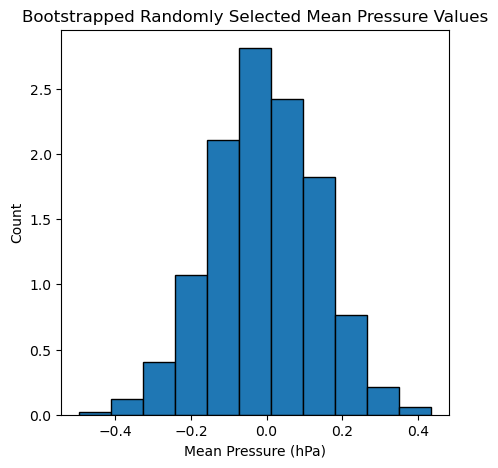

In [372]:
### Now Bootstrap Nbs times to generate a distribution of randomly selected mean SWE.
Num_BootStraps = 1000
P_Bootstrap=np.empty((Num_BootStraps,50)) #initialize empty array to fill in bootstrapped samples

## loop over to fill in array with randomly selected values
for ii in range(Num_BootStraps):
    P_Bootstrap[ii,:]=np.random.choice(hPa_norm,50)

## Calculate the means of your randomly selected hPa values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print('Mean Avg: ', P_Bootstrap_mean_avg)
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print('Mean std: ', P_Bootstrap_mean_std)
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print('Mean min: ', P_Bootstrap_mean_min)
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print('Mean max: ', P_Bootstrap_mean_max)

### Use matplotlib to plot a histogram of the bootstrapped means to compare to the conditioned SWE mean
binsize=0.1
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black', density=True)
plt.xlabel('Mean Pressure (hPa)');
plt.ylabel('Count');
plt.title('Bootstrapped Randomly Selected Mean Pressure Values');

In [384]:
## What is the probability that the snowfall was lower during El Nino by chance?
## Using Barnes equation (83) on page 15 to calculate probability using z-statistic
sample_mean=np.mean(hPa_norm[rain_filter])
# sample_N=hPa_norm.shape[0]
sample_N=hPa_norm[rain_filter].shape[0]
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_rain=(sample_mean-population_mean)/xstd

print(f'     sample_mean - normalized pressure when raining: {np.round(sample_mean,2)}')
print(f'                                    population_mean: {np.round(population_mean,2)}')
print(f'                                     population_std: {np.round(population_std,2)}')
# print(f'Z-statistic (# standard errors that the sample mean deviates from the population mean: {np.round(z_rain,2)}')
print(f'                                        Z-statistic: {np.round(z_rain,2)}')
prob=(1-stats.norm.cdf(np.abs(z_rain)))*100 ##this is a one-sided test
print(f'Probability happened by chance, one-tailed test (%): {np.round(prob,0)}%')

     sample_mean - normalized pressure when raining: 0.12
                                    population_mean: -0.0
                                     population_std: 0.14
                                        Z-statistic: 18.16
Probability happened by chance, one-tailed test (%): 0.0%


-0.02375776202276553
-0.226753642131569
The 95% confidence interval (z-test) is:  -0.226753642131569 <X< -0.02375776202276553


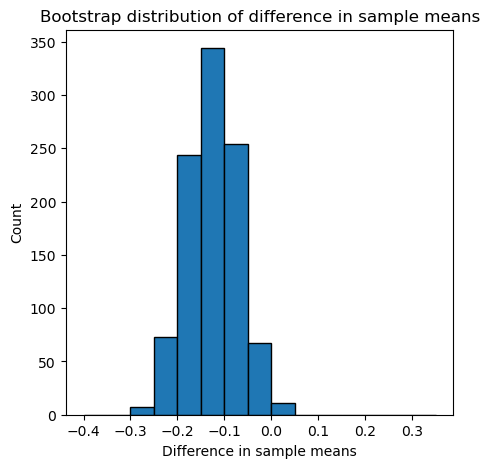

In [421]:
### Another bootstrapping strategy (provided by Vineel Yettella)
# SWE = data['BerthoudPass_April1SWE_inches']
# SWE_nino = data[data.Nino34_anomaly_prevDec>1.0]['BerthoudPass_April1SWE_inches']

#We start by setting up a null hypothesis H0. 
#Our H0 will be that the difference in means of the two populations that the samples came from is equal to zero.
#We will use the bootstrap to test this null hypothesis.

#We next choose a significance level for the hypothesis test
alpha = 0.05

#All hypothesis tests need a test statistic.
#Here, we'll use the difference in sample means as the test statistic.
#create array to hold bootstrapped test statistic values
bootstrap_statistic = np.empty(1000)

#bootstrap 10000 times
for i in range(1,1000):
    
    #create a resample of SWE by sampling with replacement (same length as SWE)
    resample_original = np.random.choice(hPa_norm, len(hPa_norm), replace=True)
    
    #create a resample of SWE_nino by sampling with replacement (same length as SWE_nino)
    resample_rain_pressure = np.random.choice(hPa_norm[rain_filter], len(hPa_norm[rain_filter]), replace=True)
    
    #Compute the test statistic from the resampled data, i.e., the difference in means
    bootstrap_statistic[i] = np.mean(resample_original) - np.mean(resample_rain_pressure)

#Let's plot the distribution of the test statistic
plt.hist(bootstrap_statistic,np.arange(-0.4,0.4,0.05),edgecolor='black')
plt.xlabel('Difference in sample means')
plt.ylabel('Count')
plt.title('Bootstrap distribution of difference in sample means')

#Create 95% CI from the bootstrapped distribution. The upper limit of the CI is defined as the 97.5% percentile
#and the lower limit as the 2.5% percentile of the boostrap distribution, so that 95% of the 
#distribution lies within the two limits

CI_up = np.percentile(bootstrap_statistic, 100*(1 - alpha/2.0))
CI_lo = np.percentile(bootstrap_statistic, 100*(alpha/2.0))

print(CI_up)
print(CI_lo)

print('The 95% confidence interval (z-test) is: ', CI_lo, '<X<', CI_up)

#We see that the confidence interval contains zero, so we fail to reject the null hypothesis that the difference
#in means is equal to zero

In [422]:
np.mean(resample_rain_pressure)

0.1432624876328776